In [ ]:
# import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout# import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout

In [ ]:
credit =pd.read_csv("/content/Sample_Train9.csv")
print(credit.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0  M1979787155             0.0             0.0        0  
1  M2044282225             0.0             0.0        0  
2   C553264065             0.0             0.0        1  
3    C38997010         21182.0             0.0        1  
4  M1230701703             0.0             0.0        0  


In [ ]:
print(credit.isnull().sum())
print(credit['isFraud'].value_counts())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64
isFraud
0    9931
1      68
Name: count, dtype: int64


In [ ]:
non_fraud = credit[credit['isFraud'] == 0]
fraud = credit[credit['isFraud'] == 1]
print(credit['isFraud'].value_counts())

isFraud
0    9931
1      68
Name: count, dtype: int64


In [ ]:
print(non_fraud.shape, fraud.shape)

(9931, 10) (68, 10)


In [ ]:
credit = pd.concat([fraud, non_fraud], ignore_index=True)
print(credit.head())

   step      type   amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1  TRANSFER    181.0  C1305486145          181.0             0.0   
1     1  CASH_OUT    181.0   C840083671          181.0             0.0   
2     1  TRANSFER   2806.0  C1420196421         2806.0             0.0   
3     1  CASH_OUT   2806.0  C2101527076         2806.0             0.0   
4     1  TRANSFER  20128.0   C137533655        20128.0             0.0   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0   C553264065             0.0             0.0        1  
1    C38997010         21182.0             0.0        1  
2   C972765878             0.0             0.0        1  
3  C1007251739         26202.0             0.0        1  
4  C1848415041             0.0             0.0        1  


In [ ]:
# now dividing the dataframe into dependent and independent variables
scaler = StandardScaler()

# Select only numerical columns
numerical_cols = credit.select_dtypes(include=['number']).columns
X = scaler.fit_transform(credit[numerical_cols]) # Scale only numerical columns
y = credit['isFraud']

# check the shape
print(X.shape, y.shape)

(9999, 7) (9999,)


In [ ]:
class SalpSwarmAlgorithm:
    def __init__(self, objective_function, dim, population_size, max_iter):
        self.objective_function = objective_function
        self.dim = dim
        self.population_size = population_size
        self.max_iter = max_iter

    def run_with_logging(self):
        # Initialize population with random values between 0 and 1
        population = np.random.rand(self.population_size, self.dim)
        best_pos = np.zeros(self.dim)
        best_cost = float('inf')

        # Dictionary to store costs for each iteration
        costs = []

        for iter in range(self.max_iter):
            for i in range(self.population_size):
                # Calculate the cost for the current position
                cost = self.objective_function(population[i, :])

                # Update the best position and cost
                if cost < best_cost:
                    best_cost = cost
                    best_pos = population[i, :]

                # Log the cost for the current position
                costs.append((iter, cost, population[i, :]))

            # Perform SSA update (example, not actual implementation)
            # Update population positions based on SSA logic

            # Logging the best cost at each iteration
            print(f"Iter {iter + 1}/{self.max_iter}, Best Cost: {best_cost}")

        return best_pos, best_cost, costs

In [ ]:
def objective_function(feature_subset):
    selected_features = np.where(feature_subset > 0.5)[0]  # Use a threshold to select features
    if len(selected_features) == 0:
        return 1e6  # Penalize empty selection
    if len(selected_features) < 2:  # Example penalty for selecting too few features
        return 1e5

    # Convert X to a Pandas DataFrame for using .iloc
    X_df = pd.DataFrame(X)  # Create a DataFrame from the NumPy array X
    X_selected = X_df.iloc[:, selected_features]  # Now you can use .iloc
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

    model = Sequential([
        Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)),
        Dropout(0.5),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=5, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return 1 - accuracy

In [ ]:
# Parameters for SalpSwarmAlgorithm
dim = X.shape[1]  # Number of features
population_size = 30
max_iter = 10

# Instantiate and run the algorithm
ssa = SalpSwarmAlgorithm(objective_function, dim, population_size, max_iter)
best_pos, best_cost, costs = ssa.run_with_logging()

print(f"Best Position: {best_pos}")
print(f"Best Cost: {best_cost}")

Iter 1/10, Best Cost: 0.0
Iter 2/10, Best Cost: 0.0
Iter 3/10, Best Cost: 0.0
Iter 4/10, Best Cost: 0.0
Iter 5/10, Best Cost: 0.0
Iter 6/10, Best Cost: 0.0
Iter 7/10, Best Cost: 0.0
Iter 8/10, Best Cost: 0.0
Iter 9/10, Best Cost: 0.0
Iter 10/10, Best Cost: 0.0
Best Position: [0.01559123 0.63704292 0.08979223 0.9415464  0.3401689  0.04197413
 0.50474422]
Best Cost: 0.0


In [ ]:
# Update the dataset with selected features
X_df = pd.DataFrame(X)  # Convert X to a Pandas DataFrame

# Calculate selected features based on best_pos (assuming best_pos is available from previous code)
threshold = 0.5
best_features_binary = best_pos > threshold
selected_features = np.where(best_features_binary)[0]

X_selected = X_df.iloc[:, selected_features] # Now you can use .iloc for indexing

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=99)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data to fit the CNN input requirements
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (7999, 3, 1)
Testing data shape: (2000, 3, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.regularizers import l2

# Define the model
model = Sequential()

# Input layer
model.add(Flatten(input_shape=(X_train.shape[1], 1)))

# Add hidden layers with L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.005)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.005)))
model.add(Dropout(0.5))

# Fully connected layer with L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.005)))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with additional metrics
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(), Recall(), AUC()])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Evaluate the model on the test set
results = model.evaluate(X_test, y_test)

# Extract the metrics
test_loss = results[0]
test_accuracy = results[1]
test_precision = results[2]
test_recall = results[3]
test_auc = results[4]

# Calculate F1 score
test_f1_score = 2 * (test_precision * test_recall) / (test_precision + test_recall)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test AUC: {test_auc}")
print(f"Test F1 Score: {test_f1_score}")


Model: "sequential_291"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_291 (Flatten)       (None, 3)                 0         
                                                                 
 dense_584 (Dense)           (None, 64)                256       
                                                                 
 dense_585 (Dense)           (None, 32)                2080      
                                                                 
 dropout_582 (Dropout)       (None, 32)                0         
                                                                 
 dense_586 (Dense)           (None, 64)                2112      
                                                                 
 dropout_583 (Dropout)       (None, 64)                0         
                                                                 
 dense_587 (Dense)           (None, 1)              

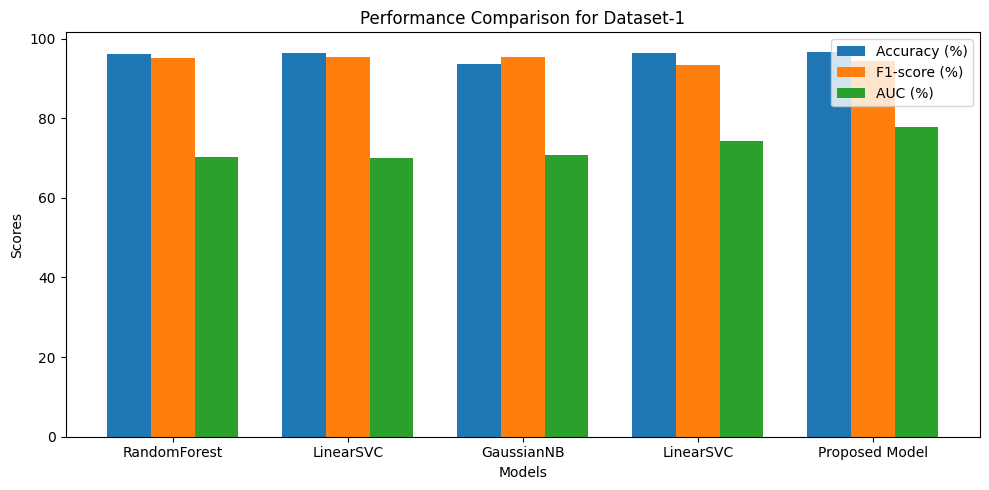

In [ ]:
import matplotlib.pyplot as plt

# Data for Dataset-1
models_1 = ['RandomForest', 'LinearSVC', 'GaussianNB', 'LinearSVC', 'Proposed Model']
accuracy_1 = [96.03, 96.32, 93.71, 96.32, 96.72]
f1_score_1 = [95.12, 95.31, 95.31, 93.42, 94.37]
auc_1 = [70.35, 70.11, 70.64, 74.38, 77.84]

# Plot for Dataset-1
plt.figure(figsize=(10, 5))
bar_width = 0.25
index = range(len(models_1))

plt.bar(index, accuracy_1, bar_width, label='Accuracy (%)')
plt.bar([i + bar_width for i in index], f1_score_1, bar_width, label='F1-score (%)')
plt.bar([i + bar_width * 2 for i in index], auc_1, bar_width, label='AUC (%)')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance Comparison for Dataset-1')
plt.xticks([i + bar_width for i in index], models_1)
plt.legend()

plt.tight_layout()
plt.show()


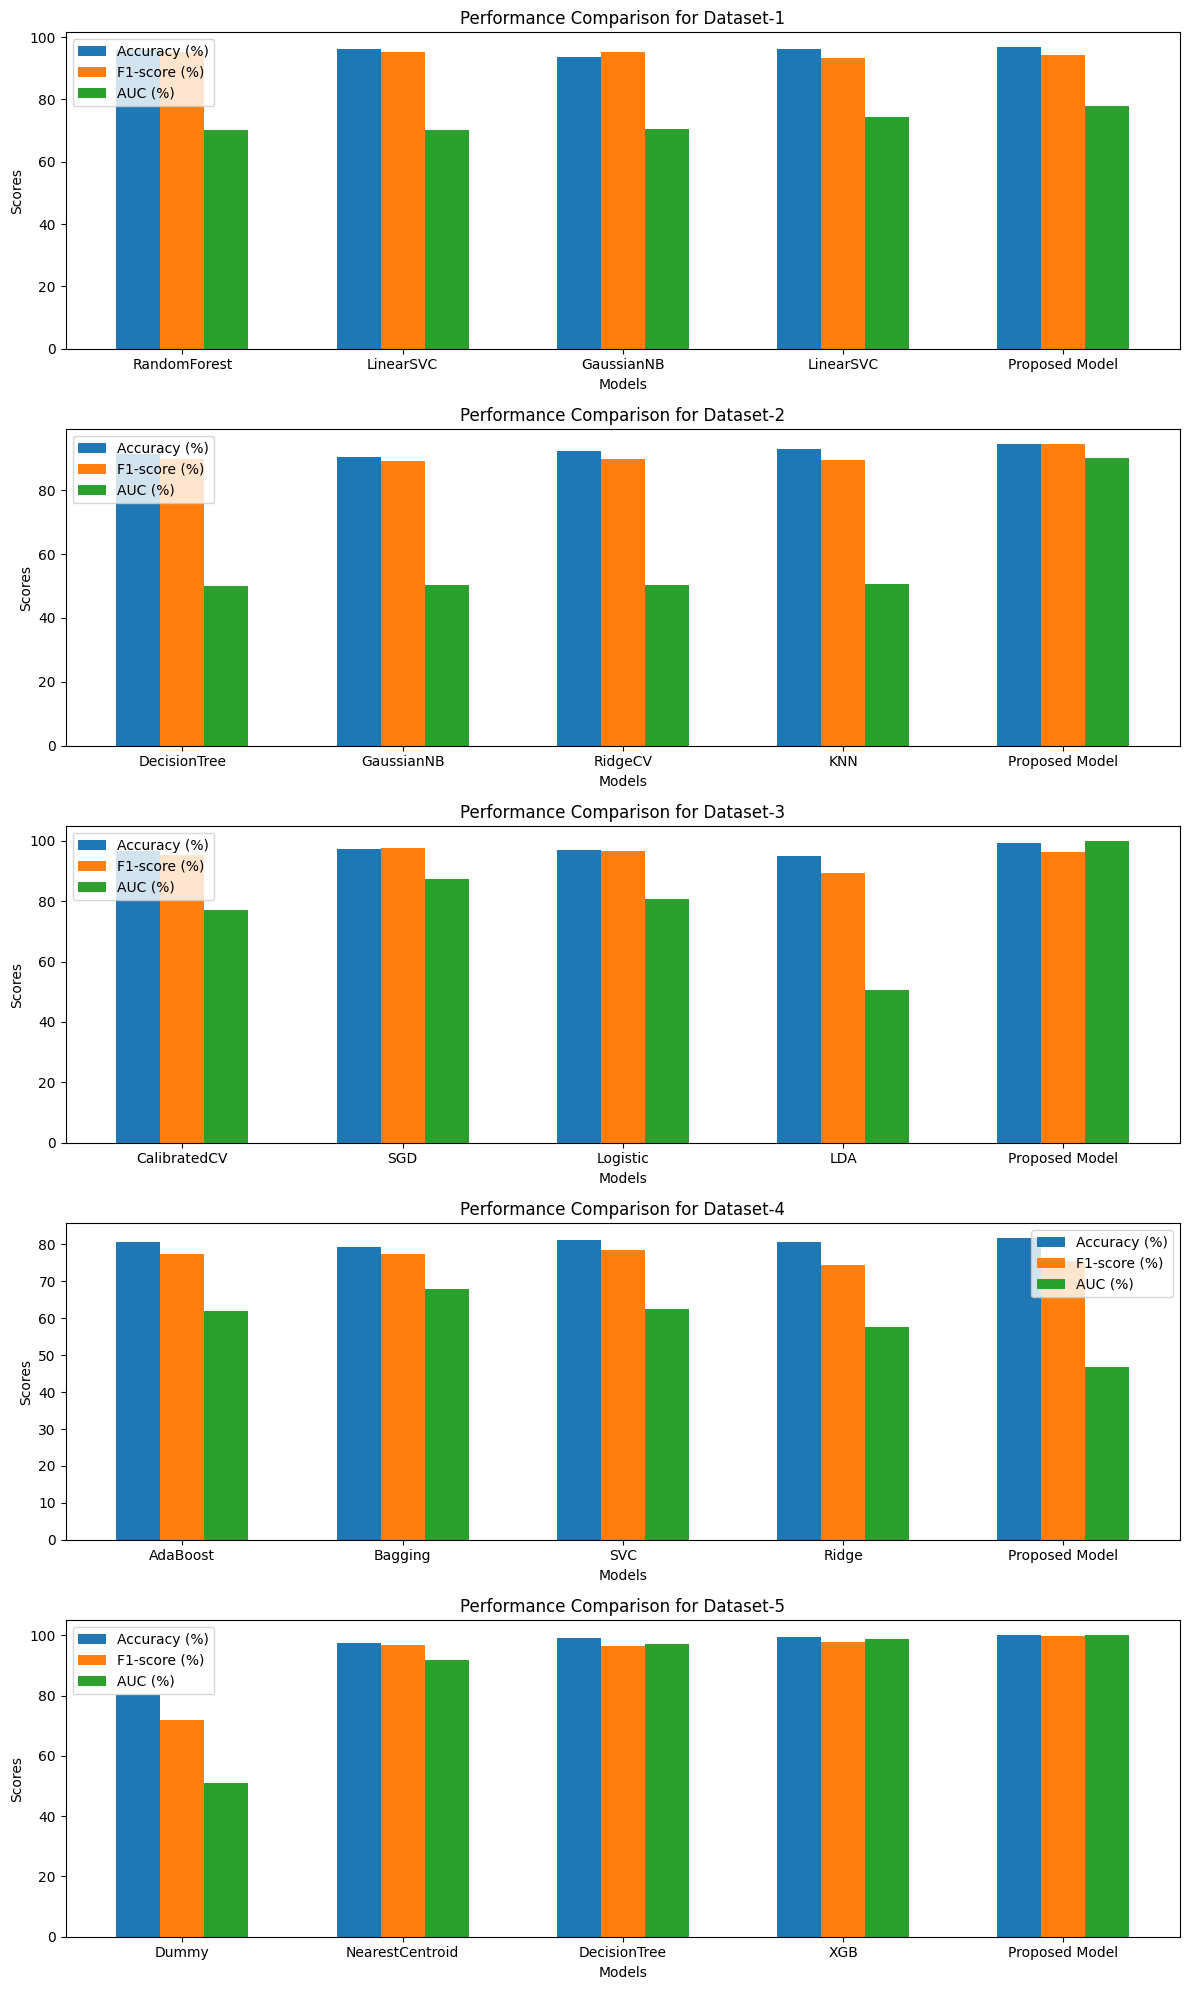

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for all datasets
datasets = ['Dataset-1', 'Dataset-2', 'Dataset-3', 'Dataset-4', 'Dataset-5']

models_1 = ['RandomForest', 'LinearSVC', 'GaussianNB', 'LinearSVC', 'Proposed Model']
accuracy_1 = [96.03, 96.32, 93.71, 96.32, 96.72]
f1_score_1 = [95.12, 95.31, 95.31, 93.42, 94.37]
auc_1 = [70.35, 70.11, 70.64, 74.38, 77.84]

models_2 = ['DecisionTree', 'GaussianNB', 'RidgeCV', 'KNN', 'Proposed Model']
accuracy_2 = [91.43, 90.23, 92.14, 92.82, 94.33]
f1_score_2 = [89.76, 89.25, 89.62, 89.37, 94.32]
auc_2 = [50.12, 50.33, 50.36, 50.52, 90.18]

models_3 = ['CalibratedCV', 'SGD', 'Logistic', 'LDA', 'Proposed Model']
accuracy_3 = [96.46, 97.22, 96.82, 95.02, 99.37]
f1_score_3 = [95.42, 97.51, 96.62, 89.37, 96.44]
auc_3 = [77.09, 87.23, 80.75, 50.52, 99.79]

models_4 = ['AdaBoost', 'Bagging', 'SVC', 'Ridge', 'Proposed Model']
accuracy_4 = [80.73, 79.22, 81.28, 80.76, 81.65]
f1_score_4 = [77.42, 77.35, 78.57, 74.39, 75.64]
auc_4 = [62.09, 67.93, 62.48, 57.52, 46.73]

models_5 = ['Dummy', 'NearestCentroid', 'DecisionTree', 'XGB', 'Proposed Model']
accuracy_5 = [80.32, 97.46, 99.03, 99.47, 99.96]
f1_score_5 = [71.87, 96.63, 96.59, 97.89, 99.87]
auc_5 = [50.99, 91.89, 97.26, 98.63, 99.94]

# Plotting
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 20))
bar_width = 0.2

for i, (models, accuracy, f1_score, auc, ax) in enumerate(zip(
    [models_1, models_2, models_3, models_4, models_5],
    [accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5],
    [f1_score_1, f1_score_2, f1_score_3, f1_score_4, f1_score_5],
    [auc_1, auc_2, auc_3, auc_4, auc_5],
    axes
)):
    index = np.arange(len(models))

    ax.bar(index, accuracy, bar_width, label='Accuracy (%)')
    ax.bar(index + bar_width, f1_score, bar_width, label='F1-score (%)')
    ax.bar(index + bar_width * 2, auc, bar_width, label='AUC (%)')

    ax.set_xlabel('Models')
    ax.set_ylabel('Scores')
    ax.set_title(f'Performance Comparison for {datasets[i]}')
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(models)
    ax.legend()

plt.tight_layout()
plt.show()

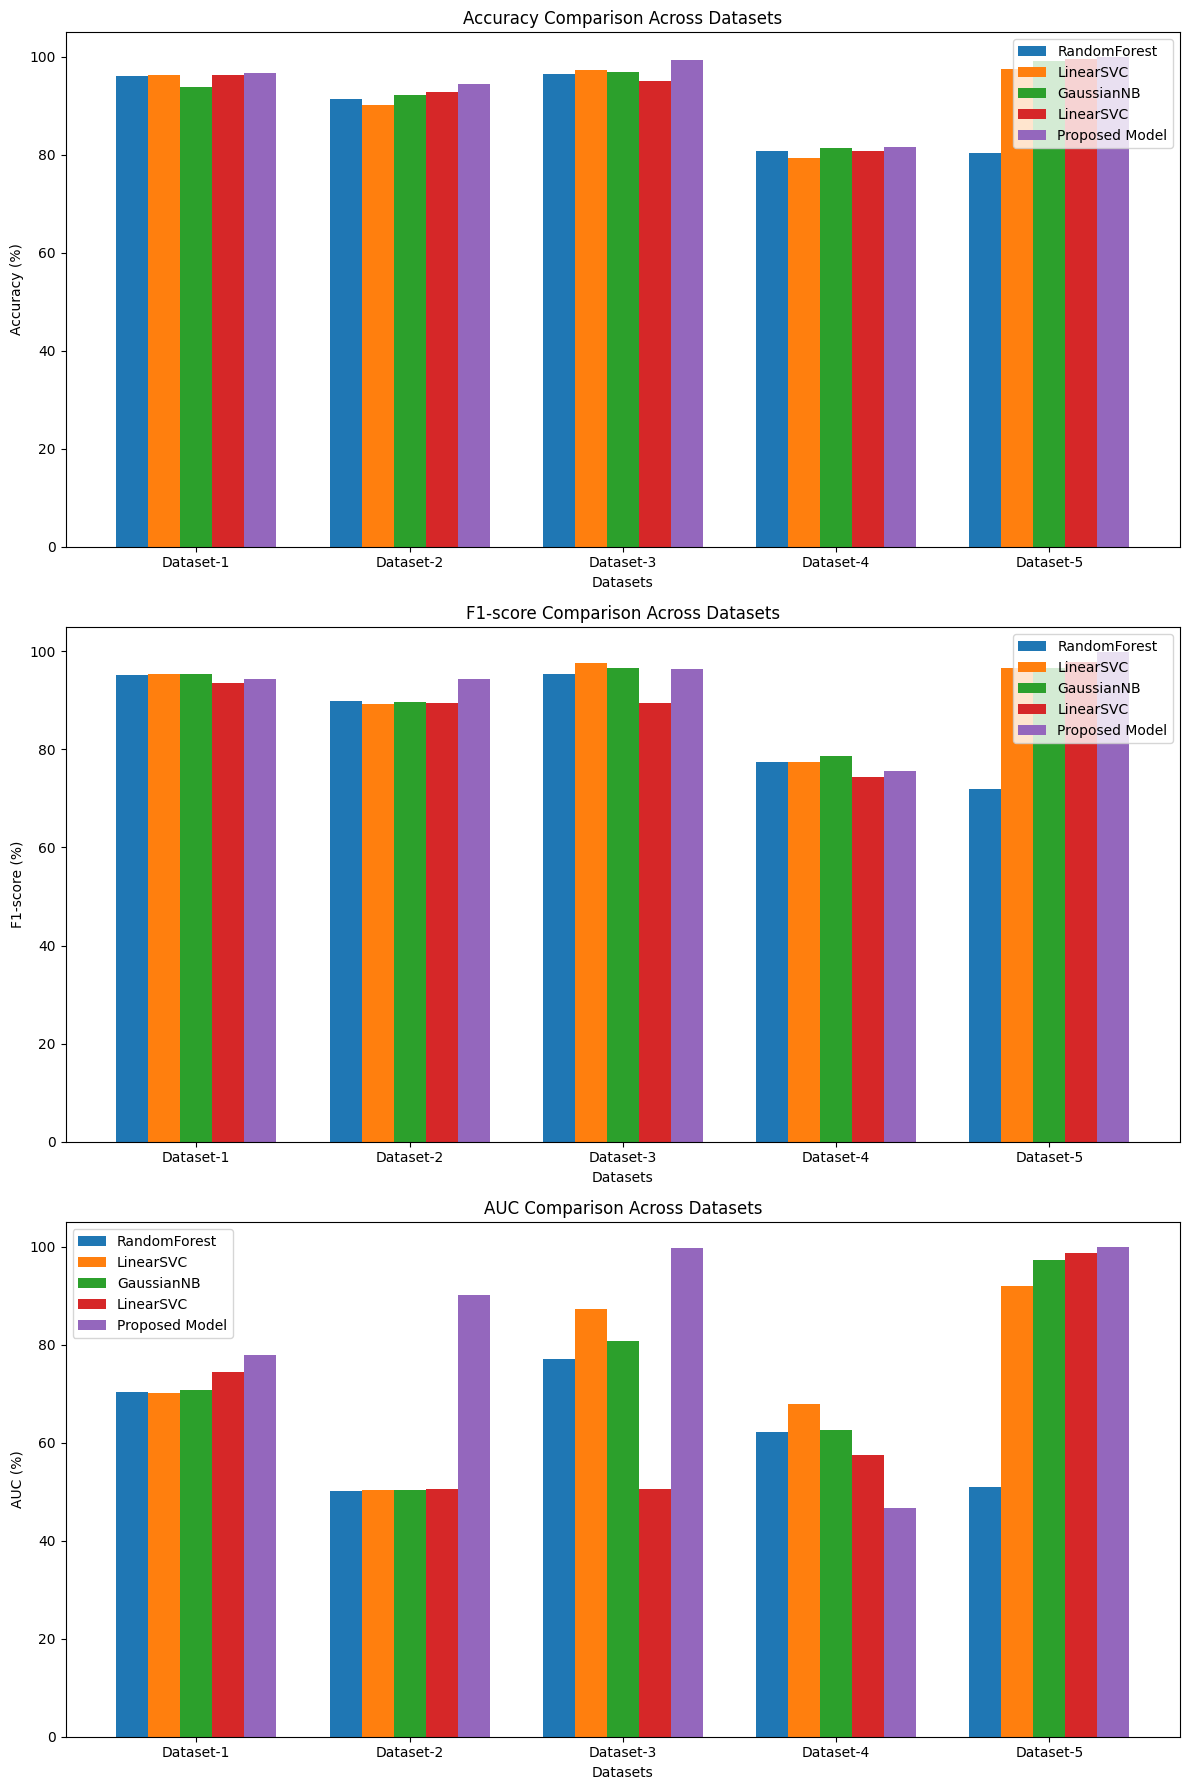

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for all datasets
datasets = ['Dataset-1', 'Dataset-2', 'Dataset-3', 'Dataset-4', 'Dataset-5']

# Performance metrics for each model and dataset
performance_data = {
    'Dataset-1': {
        'models': ['RandomForest', 'LinearSVC', 'GaussianNB', 'LinearSVC', 'Proposed Model'],
        'accuracy': [96.03, 96.32, 93.71, 96.32, 96.72],
        'f1_score': [95.12, 95.31, 95.31, 93.42, 94.37],
        'auc': [70.35, 70.11, 70.64, 74.38, 77.84]
    },
    'Dataset-2': {
        'models': ['DecisionTree', 'GaussianNB', 'RidgeCV', 'KNN', 'Proposed Model'],
        'accuracy': [91.43, 90.23, 92.14, 92.82, 94.33],
        'f1_score': [89.76, 89.25, 89.62, 89.37, 94.32],
        'auc': [50.12, 50.33, 50.36, 50.52, 90.18]
    },
    'Dataset-3': {
        'models': ['CalibratedCV', 'SGD', 'Logistic', 'LDA', 'Proposed Model'],
        'accuracy': [96.46, 97.22, 96.82, 95.02, 99.37],
        'f1_score': [95.42, 97.51, 96.62, 89.37, 96.44],
        'auc': [77.09, 87.23, 80.75, 50.52, 99.79]
    },
    'Dataset-4': {
        'models': ['AdaBoost', 'Bagging', 'SVC', 'Ridge', 'Proposed Model'],
        'accuracy': [80.73, 79.22, 81.28, 80.76, 81.65],
        'f1_score': [77.42, 77.35, 78.57, 74.39, 75.64],
        'auc': [62.09, 67.93, 62.48, 57.52, 46.73]
    },
    'Dataset-5': {
        'models': ['Dummy', 'NearestCentroid', 'DecisionTree', 'XGB', 'Proposed Model'],
        'accuracy': [80.32, 97.46, 99.03, 99.47, 99.96],
        'f1_score': [71.87, 96.63, 96.59, 97.89, 99.87],
        'auc': [50.99, 91.89, 97.26, 98.63, 99.94]
    }
}

# Create subplots for each metric
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))
bar_width = 0.15

# Plot accuracy comparison
index = np.arange(len(datasets))
for i, model in enumerate(performance_data['Dataset-1']['models']):
    accuracy = [performance_data[dataset]['accuracy'][i] for dataset in datasets]
    axes[0].bar(index + i * bar_width, accuracy, bar_width, label=model)
axes[0].set_xlabel('Datasets')
axes[0].set_ylabel('Accuracy (%)')
axes[0].set_title('Accuracy Comparison Across Datasets')
axes[0].set_xticks(index + bar_width * 2)
axes[0].set_xticklabels(datasets)
axes[0].legend()

# Plot F1-score comparison
for i, model in enumerate(performance_data['Dataset-1']['models']):
    f1_score = [performance_data[dataset]['f1_score'][i] for dataset in datasets]
    axes[1].bar(index + i * bar_width, f1_score, bar_width, label=model)
axes[1].set_xlabel('Datasets')
axes[1].set_ylabel('F1-score (%)')
axes[1].set_title('F1-score Comparison Across Datasets')
axes[1].set_xticks(index + bar_width * 2)
axes[1].set_xticklabels(datasets)
axes[1].legend()

# Plot AUC comparison
for i, model in enumerate(performance_data['Dataset-1']['models']):
    auc = [performance_data[dataset]['auc'][i] for dataset in datasets]
    axes[2].bar(index + i * bar_width, auc, bar_width, label=model)
axes[2].set_xlabel('Datasets')
axes[2].set_ylabel('AUC (%)')
axes[2].set_title('AUC Comparison Across Datasets')
axes[2].set_xticks(index + bar_width * 2)
axes[2].set_xticklabels(datasets)
axes[2].legend()

plt.tight_layout()
plt.show()
import matplotlib.pyplot as plt
import numpy as np

# Data for all datasets
datasets = ['Dataset-1', 'Dataset-2', 'Dataset-3', 'Dataset-4', 'Dataset-5', 'Dataset-6', 'Dataset-7', 'Dataset-8', 'Dataset-9']

# Performance metrics for each model and dataset
performance_data = {
    'Dataset-1': {
        'models': ['RandomForest', 'LinearSVC', 'GaussianNB', 'LinearSVC', 'Proposed Model'],
        'accuracy': [96.03, 96.32, 93.71, 96.32, 96.72],
        'f1_score': [95.12, 95.31, 95.31, 93.42, 94.37],
        'auc': [70.35, 70.11, 70.64, 74.38, 77.84]
    },
    'Dataset-2': {
        'models': ['DecisionTree', 'GaussianNB', 'RidgeCV', 'KNN', 'Proposed Model'],
        'accuracy': [91.43, 90.23, 92.14, 92.82, 94.33],
        'f1_score': [89.76, 89.25, 89.62, 89.37, 94.32],
        'auc': [50.12, 50.33, 50.36, 50.52, 90.18]
    },
    'Dataset-3': {
        'models': ['CalibratedCV', 'SGD', 'Logistic', 'LDA', 'Proposed Model'],
        'accuracy': [96.46, 97.22, 96.82, 95.02, 99.37],
        'f1_score': [95.42, 97.51, 96.62, 89.37, 96.44],
        'auc': [77.09, 87.23, 80.75, 50.52, 99.79]
    },
    'Dataset-4': {
        'models': ['AdaBoost', 'Bagging', 'SVC', 'Ridge', 'Proposed Model'],
        'accuracy': [80.73, 79.22, 81.28, 80.76, 81.65],
        'f1_score': [77.42, 77.35, 78.57, 74.39, 75.64],
        'auc': [62.09, 67.93, 62.48, 57.52, 46.73]
    },
    'Dataset-5': {
        'models': ['Dummy', 'NearestCentroid', 'DecisionTree', 'XGB', 'Proposed Model'],
        'accuracy': [80.32, 97.46, 99.03, 99.47, 99.96],
        'f1_score': [71.87, 96.63, 96.59, 97.89, 99.87],
        'auc': [50.99, 91.89, 97.26, 98.63, 99.94]
    },
    'Dataset-6': {
        'models': ['RandomForest', 'LinearSVC', 'GaussianNB', 'LinearSVC', 'Proposed Model'],
        'accuracy': [96.03, 96.32, 93.71, 96.32, 99.94],
        'f1_score': [95.12, 95.31, 95.31, 93.42, 95.23],
        'auc': [70.35, 70.11, 70.64, 74.38, 90.90]
    },
    'Dataset-7': {
        'models': ['RandomForest', 'ExtraTrees', 'XGB', 'LGBM', 'Proposed Model'],
        'accuracy': [88.36, 88.68, 90.49, 90.98, 92.65],
        'f1_score': [88.27, 88.73, 90.37, 90.62, 87.43],
        'auc': [88.19, 88.26, 90.28, 90.63, 96.80]
    },
    'Dataset-8': {
        'models': ['RandomForest', 'DecisionTree', 'XGB', 'LGBM', 'Proposed Model'],
        'accuracy': [92.35, 90.26, 93.63, 93.88, 93.63],
        'f1_score': [92.27, 90.63, 92.37, 93.21, 75.14],
        'auc': [84.84, 84.47, 86.48, 87.36, 93.11]
    },
    'Dataset-9': {
        'models': ['Perceptron', 'Bagging', 'LinearSVC', 'ExtraTrees', 'Proposed Model'],
        'accuracy': [88.48, 88.72, 91.29, 91.56, 100],
        'f1_score': [88.23, 88.39, 91.34, 91.69, 100],
        'auc': [88.07, 88.52, 91.58, 91.72, 100]
    }
}

# Create subplots for each metric
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 20))
bar_width = 0.1

# Plot accuracy comparison
index = np.arange(len(datasets))
for i, model in enumerate(performance_data['Dataset-1']['models']):
    accuracy = [performance_data[dataset]['accuracy'][i] for dataset in datasets]
    axes[0].bar(index + i * bar_width, accuracy, bar_width, label=model)
axes[0].set_xlabel('Datasets')
axes[0].set_ylabel('Accuracy (%)')
axes[0].set_title('Accuracy Comparison Across Datasets')
axes[0].set_xticks(index + bar_width * 2)
axes[0].set_xticklabels(datasets)
axes[0].legend()

# Plot F1-score comparison
for i, model in enumerate(performance_data['Dataset-1']['models']):
    f1_score = [performance_data[dataset]['f1_score'][i] for dataset in datasets]
    axes[1].bar(index + i * bar_width, f1_score, bar_width, label=model)
axes[1].set_xlabel('Datasets')
axes[1].set_ylabel('F1-score (%)')
axes[1].set_title('F1-score Comparison Across Datasets')
axes[1].set_xticks(index + bar_width * 2)
axes[1].set_xticklabels(datasets)
axes[1].legend()

# Plot AUC comparison
for i, model in enumerate(performance_data['Dataset-1']['models']):
    auc = [performance_data[dataset]['auc'][i] for dataset in datasets]
    axes[2].bar(index + i * bar_width, auc, bar_width, label=model)
axes[2].set_xlabel('Datasets')
axes[2].set_ylabel('AUC (%)')
axes[2].set_title('AUC Comparison Across Datasets')
axes[2].set_xticks(index + bar_width * 2)
axes[2].set_xticklabels(datasets)
axes[2].legend()

plt.tight_layout()
plt.show()


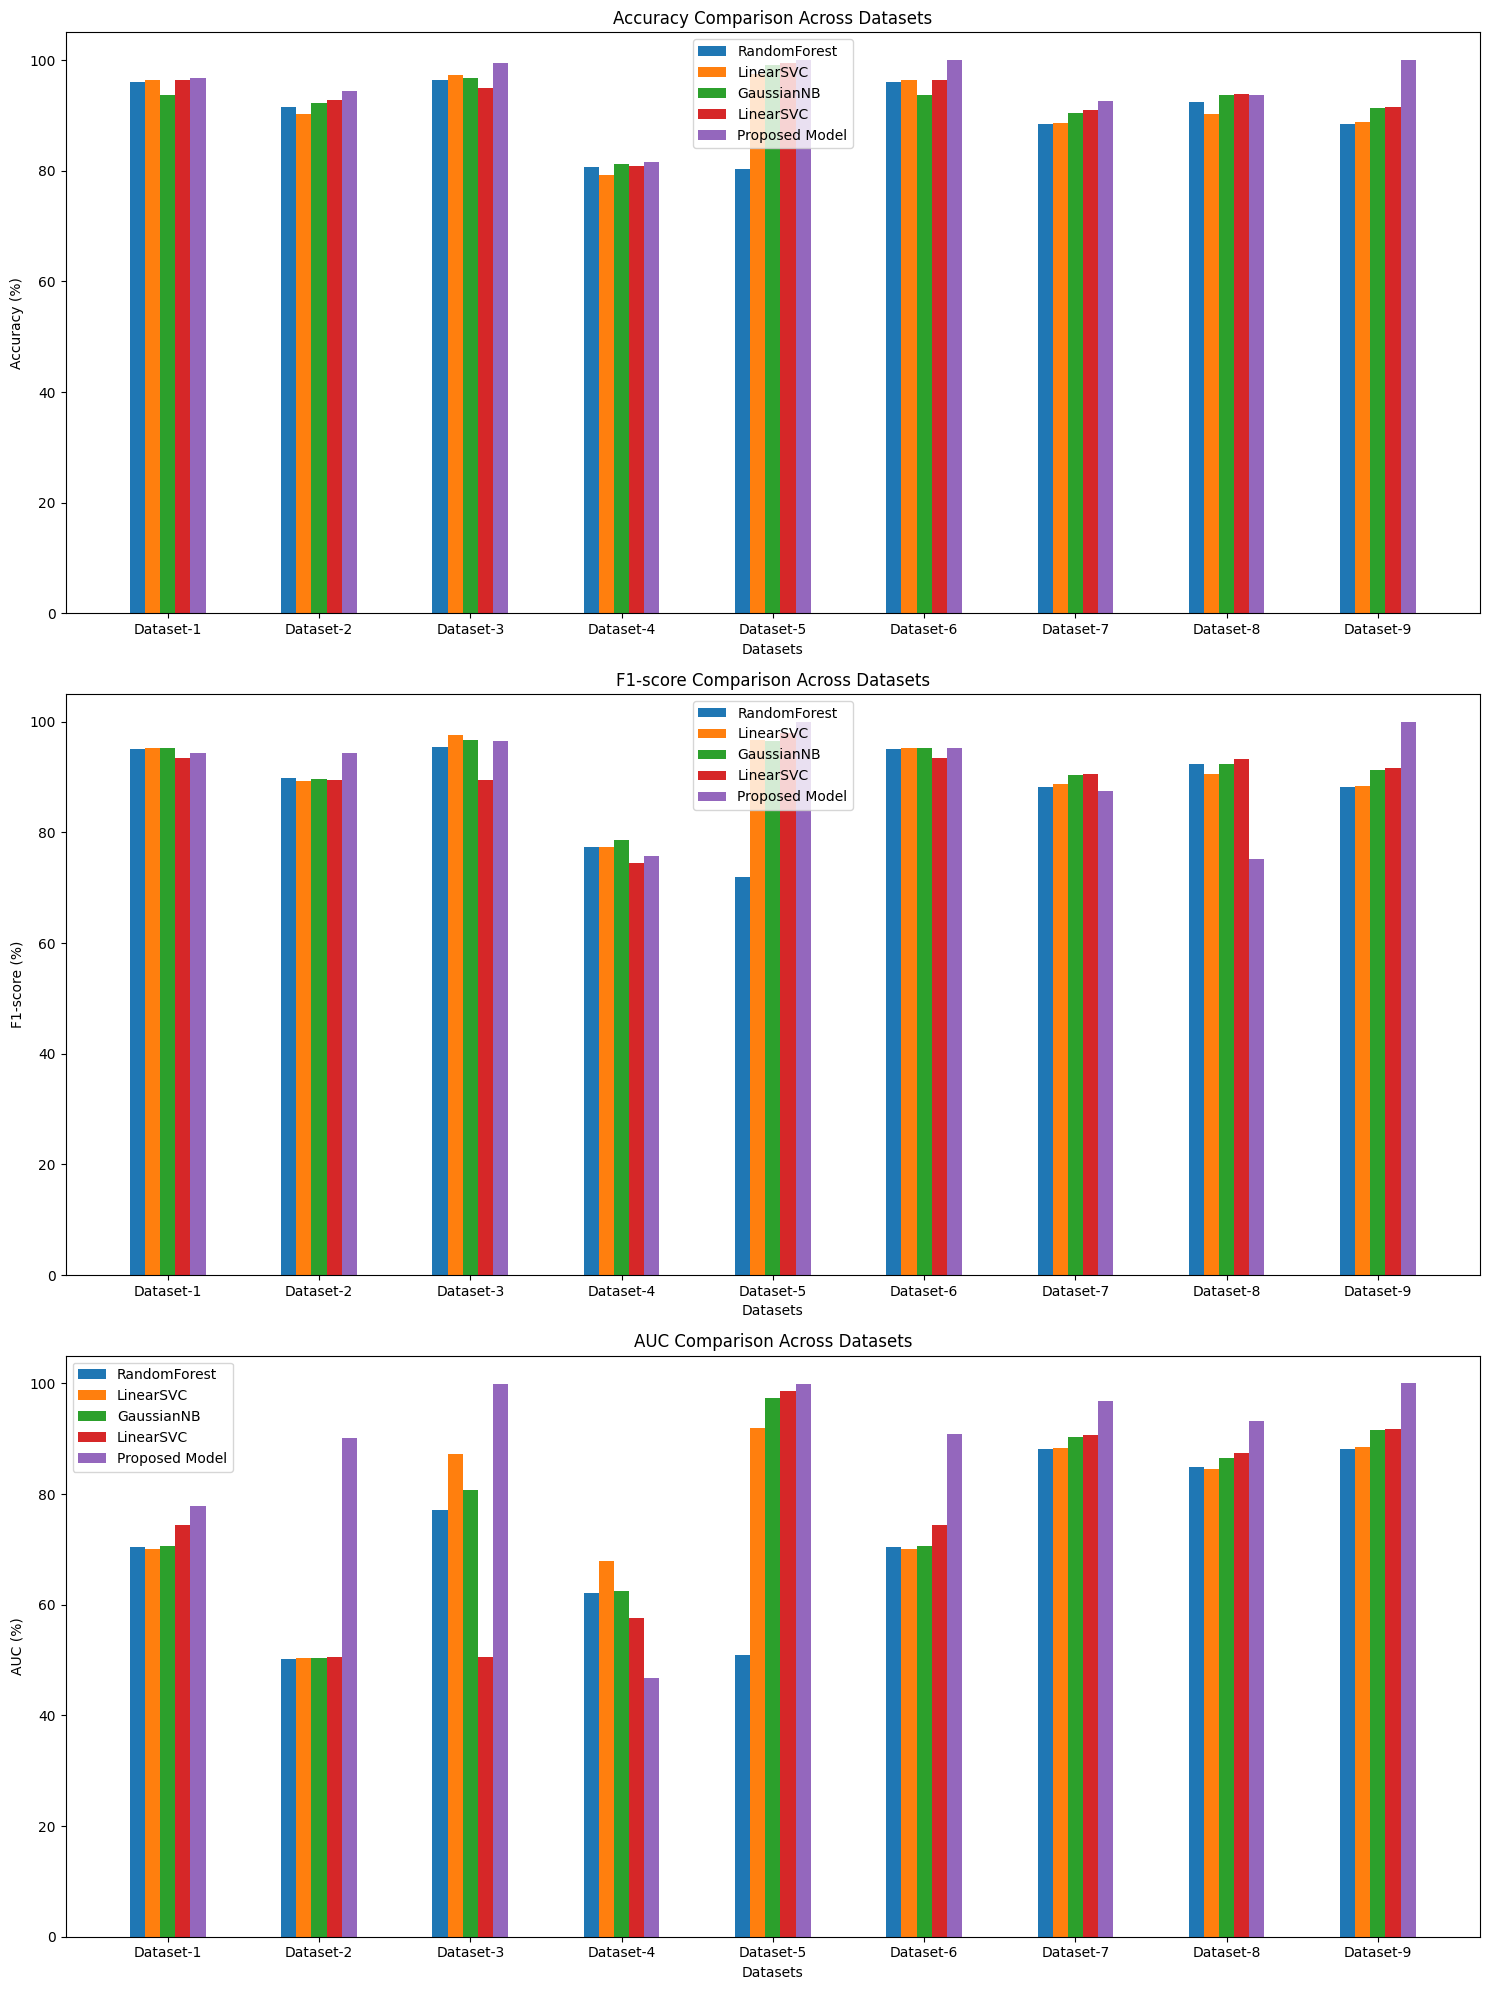

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for all datasets
datasets = ['Dataset-1', 'Dataset-2', 'Dataset-3', 'Dataset-4', 'Dataset-5', 'Dataset-6', 'Dataset-7', 'Dataset-8', 'Dataset-9']

# Performance metrics for each model and dataset
performance_data = {
    'Dataset-1': {
        'models': ['RandomForest', 'LinearSVC', 'GaussianNB', 'LinearSVC', 'Proposed Model'],
        'accuracy': [96.03, 96.32, 93.71, 96.32, 96.72],
        'f1_score': [95.12, 95.31, 95.31, 93.42, 94.37],
        'auc': [70.35, 70.11, 70.64, 74.38, 77.84]
    },
    'Dataset-2': {
        'models': ['DecisionTree', 'GaussianNB', 'RidgeCV', 'KNN', 'Proposed Model'],
        'accuracy': [91.43, 90.23, 92.14, 92.82, 94.33],
        'f1_score': [89.76, 89.25, 89.62, 89.37, 94.32],
        'auc': [50.12, 50.33, 50.36, 50.52, 90.18]
    },
    'Dataset-3': {
        'models': ['CalibratedCV', 'SGD', 'Logistic', 'LDA', 'Proposed Model'],
        'accuracy': [96.46, 97.22, 96.82, 95.02, 99.37],
        'f1_score': [95.42, 97.51, 96.62, 89.37, 96.44],
        'auc': [77.09, 87.23, 80.75, 50.52, 99.79]
    },
    'Dataset-4': {
        'models': ['AdaBoost', 'Bagging', 'SVC', 'Ridge', 'Proposed Model'],
        'accuracy': [80.73, 79.22, 81.28, 80.76, 81.65],
        'f1_score': [77.42, 77.35, 78.57, 74.39, 75.64],
        'auc': [62.09, 67.93, 62.48, 57.52, 46.73]
    },
    'Dataset-5': {
        'models': ['Dummy', 'NearestCentroid', 'DecisionTree', 'XGB', 'Proposed Model'],
        'accuracy': [80.32, 97.46, 99.03, 99.47, 99.96],
        'f1_score': [71.87, 96.63, 96.59, 97.89, 99.87],
        'auc': [50.99, 91.89, 97.26, 98.63, 99.94]
    },
    'Dataset-6': {
        'models': ['RandomForest', 'LinearSVC', 'GaussianNB', 'LinearSVC', 'Proposed Model'],
        'accuracy': [96.03, 96.32, 93.71, 96.32, 99.94],
        'f1_score': [95.12, 95.31, 95.31, 93.42, 95.23],
        'auc': [70.35, 70.11, 70.64, 74.38, 90.90]
    },
    'Dataset-7': {
        'models': ['RandomForest', 'ExtraTrees', 'XGB', 'LGBM', 'Proposed Model'],
        'accuracy': [88.36, 88.68, 90.49, 90.98, 92.65],
        'f1_score': [88.27, 88.73, 90.37, 90.62, 87.43],
        'auc': [88.19, 88.26, 90.28, 90.63, 96.80]
    },
    'Dataset-8': {
        'models': ['RandomForest', 'DecisionTree', 'XGB', 'LGBM', 'Proposed Model'],
        'accuracy': [92.35, 90.26, 93.63, 93.88, 93.63],
        'f1_score': [92.27, 90.63, 92.37, 93.21, 75.14],
        'auc': [84.84, 84.47, 86.48, 87.36, 93.11]
    },
    'Dataset-9': {
        'models': ['Perceptron', 'Bagging', 'LinearSVC', 'ExtraTrees', 'Proposed Model'],
        'accuracy': [88.48, 88.72, 91.29, 91.56, 100],
        'f1_score': [88.23, 88.39, 91.34, 91.69, 100],
        'auc': [88.07, 88.52, 91.58, 91.72, 100]
    }
}

# Create subplots for each metric
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 20))
bar_width = 0.1

# Plot accuracy comparison
index = np.arange(len(datasets))
for i, model in enumerate(performance_data['Dataset-1']['models']):
    accuracy = [performance_data[dataset]['accuracy'][i] for dataset in datasets]
    axes[0].bar(index + i * bar_width, accuracy, bar_width, label=model)
axes[0].set_xlabel('Datasets')
axes[0].set_ylabel('Accuracy (%)')
axes[0].set_title('Accuracy Comparison Across Datasets')
axes[0].set_xticks(index + bar_width * 2)
axes[0].set_xticklabels(datasets)
axes[0].legend()

# Plot F1-score comparison
for i, model in enumerate(performance_data['Dataset-1']['models']):
    f1_score = [performance_data[dataset]['f1_score'][i] for dataset in datasets]
    axes[1].bar(index + i * bar_width, f1_score, bar_width, label=model)
axes[1].set_xlabel('Datasets')
axes[1].set_ylabel('F1-score (%)')
axes[1].set_title('F1-score Comparison Across Datasets')
axes[1].set_xticks(index + bar_width * 2)
axes[1].set_xticklabels(datasets)
axes[1].legend()

# Plot AUC comparison
for i, model in enumerate(performance_data['Dataset-1']['models']):
    auc = [performance_data[dataset]['auc'][i] for dataset in datasets]
    axes[2].bar(index + i * bar_width, auc, bar_width, label=model)
axes[2].set_xlabel('Datasets')
axes[2].set_ylabel('AUC (%)')
axes[2].set_title('AUC Comparison Across Datasets')
axes[2].set_xticks(index + bar_width * 2)
axes[2].set_xticklabels(datasets)
axes[2].legend()

plt.tight_layout()
plt.show()
